In [377]:
import warnings
warnings.filterwarnings('ignore')

In [378]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pathlib as path
import numpy as np
import scipy.stats as stats

In [181]:
#Read path to DataFrame
path = pd.ExcelFile("Resources/veteran_data_set.xlsx")
vets_2013 = pd.read_excel(path, '2013')
vets_2014 = pd.read_excel(path, '2014')
vets_2015 = pd.read_excel(path, '2015')
vets_2016 = pd.read_excel(path, '2016')
vets_2017 = pd.read_excel(path, '2017')
vets_2018 = pd.read_excel(path, '2018')
vets_2019 = pd.read_excel(path, '2019')
vets_2020 = pd.read_excel(path, '2020')

# Clean out dataset to Texas only

In [368]:
#clean to Texas2013
vets_2013.fillna('', inplace=True)
tx13 = vets_2013[vets_2013['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2014
vets_2014.fillna('', inplace=True)
tx14 = vets_2014[vets_2014['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2015
vets_2015.fillna('', inplace=True)
tx15 = vets_2015[vets_2015['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2016
vets_2016.fillna('', inplace=True)
tx16 = vets_2016[vets_2016['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2017
vets_2017.fillna('', inplace=True)
tx17 = vets_2017[vets_2017['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2018
vets_2018.fillna('', inplace=True)
tx18 = vets_2018[vets_2018['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2019
vets_2019.fillna('', inplace=True)
tx19 = vets_2019[vets_2019['CoC Number'].str.startswith('TX')].reset_index(drop=True)

#clean to Texas2020
vets_2020.fillna('', inplace=True)
tx20 = vets_2020[vets_2020['CoC Number'].str.startswith('TX')].reset_index(drop=True)
tx20

,CoC Number,CoC Name,"Homeless Veterans, 2020","Sheltered ES Homeless Veterans, 2020","Sheltered TH Homeless Veterans, 2020","Sheltered SH Homeless Veterans, 2020","Sheltered Total Homeless Veterans, 2020","Unsheltered Homeless Veterans, 2020"
0,TX-500,San Antonio/Bexar County CoC,206.0,91.0,68.0,0.0,159.0,47.0
1,TX-503,Austin/Travis County CoC,309.0,22.0,30.0,54.0,106.0,203.0
2,TX-600,"Dallas City & County, Irving CoC",360.0,166.0,93.0,28.0,287.0,73.0
3,TX-601,"Fort Worth, Arlington/Tarrant County CoC",128.0,48.0,59.0,1.0,108.0,20.0
4,TX-603,El Paso City & County CoC,55.0,23.0,20.0,0.0,43.0,12.0
5,TX-604,Waco/McLennan County CoC,16.0,6.0,3.0,0.0,9.0,7.0
6,TX-607,Texas Balance of State CoC,555.0,168.0,11.0,0.0,179.0,376.0
7,TX-611,Amarillo CoC,36.0,14.0,12.0,0.0,26.0,10.0
8,TX-624,"Wichita Falls/Wise, Palo Pinto, Wichita, Arche...",11.0,8.0,1.0,0.0,9.0,2.0
9,TX-700,"Houston, Pasadena, Conroe/Harris, Ft. Bend, Mo...",267.0,86.0,77.0,23.0,186.0,81.0


In [246]:
# merge all clean tx DF together
t19 = pd.merge(tx20, tx19, on=['CoC Number', 'CoC Name'])
t18 = pd.merge(t19, tx18, on=['CoC Number', 'CoC Name'])
t17 = pd.merge(t18, tx17, on=['CoC Number', 'CoC Name'])
t16 = pd.merge(t17, tx16, on=['CoC Number', 'CoC Name'])
t15 = pd.merge(t16, tx15, on=['CoC Number', 'CoC Name'])
t14 = pd.merge(t15, tx14, on=['CoC Number', 'CoC Name'])
tx_years = pd.merge(t14, tx13, on=['CoC Number', 'CoC Name'])
tx_years.head()

,CoC Number,CoC Name,"Homeless Veterans, 2020","Sheltered ES Homeless Veterans, 2020","Sheltered TH Homeless Veterans, 2020","Sheltered SH Homeless Veterans, 2020","Sheltered Total Homeless Veterans, 2020","Unsheltered Homeless Veterans, 2020","Homeless Veterans, 2019","Sheltered ES Homeless Veterans, 2019",...,"Unsheltered Homeless Veterans, 2015","Homeless Veterans, 2014","Sheltered ES Homeless Veterans, 2014","Sheltered TH Homeless Veterans, 2014","Sheltered SH Homeless Veterans, 2014","Sheltered Total Homeless Veterans, 2014","Unsheltered Homeless Veterans, 2014","Homeless Veterans, 2013","Sheltered Total Homeless Veterans, 2013","Unsheltered Homeless Veterans, 2013"
0,TX-500,San Antonio/Bexar County CoC,206.0,91.0,68.0,0.0,159.0,47.0,215.0,88.0,...,94.0,263.0,80.0,137.0,2.0,219.0,44.0,122.0,88.0,34.0
1,TX-503,Austin/Travis County CoC,309.0,22.0,30.0,54.0,106.0,203.0,144.0,59.0,...,109.0,176.0,90.0,34.0,3.0,127.0,49.0,300.0,125.0,175.0
2,TX-600,"Dallas City & County, Irving CoC",360.0,166.0,93.0,28.0,287.0,73.0,431.0,256.0,...,49.0,335.0,214.0,77.0,2.0,293.0,42.0,303.0,263.0,40.0
3,TX-601,"Fort Worth, Arlington/Tarrant County CoC",128.0,48.0,59.0,1.0,108.0,20.0,168.0,61.0,...,19.0,252.0,105.0,112.0,0.0,217.0,35.0,217.0,166.0,51.0
4,TX-603,El Paso City & County CoC,55.0,23.0,20.0,0.0,43.0,12.0,67.0,32.0,...,18.0,123.0,40.0,27.0,0.0,67.0,56.0,136.0,80.0,56.0


# Clean out dataset to California only

In [184]:
# Clean df to california only

vets_2013.fillna('', inplace=True)
ca13 = vets_2013[vets_2013['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2014.fillna('', inplace=True)
ca14 = vets_2014[vets_2014['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2015.fillna('', inplace=True)
ca15 = vets_2015[vets_2015['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2016.fillna('', inplace=True)
ca16 = vets_2016[vets_2016['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2017.fillna('', inplace=True)
ca17 = vets_2017[vets_2017['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2018.fillna('', inplace=True)
ca18 = vets_2018[vets_2018['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2019.fillna('', inplace=True)
ca19 = vets_2019[vets_2019['CoC Number'].str.startswith('CA')].reset_index(drop=True)

vets_2020.fillna('', inplace=True)
ca20 = vets_2020[vets_2020['CoC Number'].str.startswith('CA')].reset_index(drop=True)

In [245]:
# merge all clean CA DF together
c19 = pd.merge(ca20, ca19, on=['CoC Number', 'CoC Name'])
c18 = pd.merge(c19, ca18, on=['CoC Number', 'CoC Name'])
c17 = pd.merge(c18, ca17, on=['CoC Number', 'CoC Name'])
c16 = pd.merge(c17, ca16, on=['CoC Number', 'CoC Name'])
c15 = pd.merge(c16, ca15, on=['CoC Number', 'CoC Name'])
c14 = pd.merge(c15, ca14, on=['CoC Number', 'CoC Name'])
ca_years = pd.merge(c14, ca13, on=['CoC Number', 'CoC Name'])
ca_years.head()

,CoC Number,CoC Name,"Homeless Veterans, 2020","Sheltered ES Homeless Veterans, 2020","Sheltered TH Homeless Veterans, 2020","Sheltered SH Homeless Veterans, 2020","Sheltered Total Homeless Veterans, 2020","Unsheltered Homeless Veterans, 2020","Homeless Veterans, 2019","Sheltered ES Homeless Veterans, 2019",...,"Unsheltered Homeless Veterans, 2015","Homeless Veterans, 2014","Sheltered ES Homeless Veterans, 2014","Sheltered TH Homeless Veterans, 2014","Sheltered SH Homeless Veterans, 2014","Sheltered Total Homeless Veterans, 2014","Unsheltered Homeless Veterans, 2014","Homeless Veterans, 2013","Sheltered Total Homeless Veterans, 2013","Unsheltered Homeless Veterans, 2013"
0,CA-500,San Jose/Santa Clara City & County CoC,613.0,70.0,79.0,19.0,168.0,445.0,653.0,79.0,...,446.0,813.0,91.0,143.0,0.0,234.0,579.0,718.0,139.0,579.0
1,CA-501,San Francisco CoC,699.0,156.0,52.0,0.0,208.0,491.0,608.0,65.0,...,352.0,720.0,108.0,190.0,0.0,298.0,422.0,716.0,294.0,422.0
2,CA-502,"Oakland, Berkeley/Alameda County CoC",722.0,77.0,73.0,27.0,177.0,545.0,692.0,39.0,...,231.0,538.0,40.0,145.0,0.0,185.0,353.0,492.0,139.0,353.0
3,CA-503,Sacramento City & County CoC,646.0,67.0,91.0,0.0,158.0,488.0,667.0,101.0,...,142.0,277.0,55.0,86.0,0.0,141.0,136.0,302.0,166.0,136.0
4,CA-504,"Santa Rosa, Petaluma/Sonoma County CoC",139.0,36.0,11.0,0.0,47.0,92.0,210.0,32.0,...,136.0,421.0,48.0,30.0,0.0,78.0,343.0,400.0,57.0,343.0


In [230]:
# Texas mean of total homeless veterans
tx_total_20 = tx_years["Homeless Veterans, 2020"].mean().round(0)
tx_total_19 = tx_years["Homeless Veterans, 2019"].mean().round(0)
tx_total_18 = tx_years["Homeless Veterans, 2018"].mean().round(0)
tx_total_17 = tx_years["Homeless Veterans, 2017"].mean().round(0)
tx_total_16 = tx_years["Homeless Veterans, 2016"].mean().round(0)
tx_total_15 = tx_years["Homeless Veterans, 2015"].mean().round(0)
tx_total_14 = tx_years["Homeless Veterans, 2014"].mean().round(0)
tx_total_13 = tx_years["Homeless Veterans, 2013"].mean().round(0)

# Texas mean of total sheltered homeless veterans
tx_unsheltered_20 = tx_years["Unsheltered Homeless Veterans, 2020"].mean().round(0)
tx_unsheltered_19 = tx_years["Unsheltered Homeless Veterans, 2019"].mean().round(0)
tx_unsheltered_18 = tx_years["Unsheltered Homeless Veterans, 2018"].mean().round(0)
tx_unsheltered_17 = tx_years["Unsheltered Homeless Veterans, 2017"].mean().round(0)
tx_unsheltered_16 = tx_years["Unsheltered Homeless Veterans, 2016"].mean().round(0)
tx_unsheltered_15 = tx_years["Unsheltered Homeless Veterans, 2015"].mean().round(0)
tx_unsheltered_14 = tx_years["Unsheltered Homeless Veterans, 2014"].mean().round(0)
tx_unsheltered_13 = tx_years["Unsheltered Homeless Veterans, 2013"].mean().round(0)

# Texas mean of total sheltered homeless veterans
tx_sheltered_20 = tx_years["Sheltered Total Homeless Veterans, 2020"].mean().round(0)
tx_sheltered_19 = tx_years["Sheltered Total Homeless Veterans, 2019"].mean().round(0)
tx_sheltered_18 = tx_years["Sheltered Total Homeless Veterans, 2018"].mean().round(0)
tx_sheltered_17 = tx_years["Sheltered Total Homeless Veterans, 2017"].mean().round(0)
tx_sheltered_16 = tx_years["Sheltered Total Homeless Veterans, 2016"].mean().round(0)
tx_sheltered_15 = tx_years["Sheltered Total Homeless Veterans, 2015"].mean().round(0)
tx_sheltered_14 = tx_years["Sheltered Total Homeless Veterans, 2014"].mean().round(0)
tx_sheltered_13 = tx_years["Sheltered Total Homeless Veterans, 2013"].mean().round(0)
tx_total_13

353.0

In [231]:
# California mean of total homeless veterans
ca_total_20 = ca_years["Homeless Veterans, 2020"].mean().round(0)
ca_total_19 = ca_years["Homeless Veterans, 2019"].mean().round(0)
ca_total_18 = ca_years["Homeless Veterans, 2018"].mean().round(0)
ca_total_17 = ca_years["Homeless Veterans, 2017"].mean().round(0)
ca_total_16 = ca_years["Homeless Veterans, 2016"].mean().round(0)
ca_total_15 = ca_years["Homeless Veterans, 2015"].mean().round(0)
ca_total_14 = ca_years["Homeless Veterans, 2014"].mean().round(0)
ca_total_13 = ca_years["Homeless Veterans, 2013"].mean().round(0)

# California mean of total homeless veterans
ca_unsheltered_20 = ca_years["Unsheltered Homeless Veterans, 2020"].mean().round(0)
ca_unsheltered_19 = ca_years["Unsheltered Homeless Veterans, 2019"].mean().round(0)
ca_unsheltered_18 = ca_years["Unsheltered Homeless Veterans, 2018"].mean().round(0)
ca_unsheltered_17 = ca_years["Unsheltered Homeless Veterans, 2017"].mean().round(0)
ca_unsheltered_16 = ca_years["Unsheltered Homeless Veterans, 2016"].mean().round(0)
ca_unsheltered_15 = ca_years["Unsheltered Homeless Veterans, 2015"].mean().round(0)
ca_unsheltered_14 = ca_years["Unsheltered Homeless Veterans, 2014"].mean().round(0)
ca_unsheltered_13 = ca_years["Unsheltered Homeless Veterans, 2013"].mean().round(0)

# California mean of total sheltered homeless veterans
ca_sheltered_20 = ca_years["Sheltered Total Homeless Veterans, 2020"].mean().round(0)
ca_sheltered_19 = ca_years["Sheltered Total Homeless Veterans, 2019"].mean().round(0)
ca_sheltered_18 = ca_years["Sheltered Total Homeless Veterans, 2018"].mean().round(0)
ca_sheltered_17 = ca_years["Sheltered Total Homeless Veterans, 2017"].mean().round(0)
ca_sheltered_16 = ca_years["Sheltered Total Homeless Veterans, 2016"].mean().round(0)
ca_sheltered_15 = ca_years["Sheltered Total Homeless Veterans, 2015"].mean().round(0)
ca_sheltered_14 = ca_years["Sheltered Total Homeless Veterans, 2014"].mean().round(0)
ca_sheltered_13 = ca_years["Sheltered Total Homeless Veterans, 2013"].mean().round(0)
ca_total_13

322.0

# New DF with California means

In [233]:
# California mean of total sheltered homeless veterans
ca_sheltered_list = [ca_sheltered_13, ca_sheltered_14, ca_sheltered_15, ca_sheltered_16, ca_sheltered_17, ca_sheltered_18, ca_sheltered_19, ca_sheltered_20]
ca_unsheltered_list = [ca_unsheltered_13, ca_unsheltered_14, ca_unsheltered_15, ca_unsheltered_16, ca_unsheltered_17, ca_unsheltered_18, ca_unsheltered_19, ca_unsheltered_20]
ca_total_list = [ca_total_13, ca_total_14, ca_total_15, ca_total_16, ca_total_17, ca_total_18, ca_total_19, ca_total_20]

In [239]:
# Create new CA avg DF
years = [2013, 2014, 2015, 2016, 2017, 2108, 2109, 2020]
ca_average_df = pd.DataFrame(index=years)
CA_columns = ['CA Avg. Homeless Veterans', 'CA Avg. Sheltered Veterans', 'CA Avg. Unsheltered Veterans']
ca_average_df[[CA_columns]] = ''
ca_average_df['CA Avg. Sheltered Veterans'] = ca_sheltered_list
ca_average_df['CA Avg. Homeless Veterans'] = ca_total_list
ca_average_df['CA Avg. Unsheltered Veterans'] = ca_unsheltered_list
ca_average_df

,CA Avg. Homeless Veterans,CA Avg. Sheltered Veterans,CA Avg. Unsheltered Veterans
2013,322.0,122.0,200.0
2014,302.0,111.0,191.0
2015,282.0,108.0,174.0
2016,239.0,100.0,139.0
2017,285.0,95.0,190.0
2108,270.0,90.0,180.0
2109,272.0,81.0,192.0
2020,282.0,85.0,197.0


# New DF with Texas means

In [236]:
# Create lists with averages
tx_sheltered_list = [tx_sheltered_13, tx_sheltered_14, tx_sheltered_15, tx_sheltered_16, tx_sheltered_17, tx_sheltered_18, tx_sheltered_19, tx_sheltered_20]
tx_unsheltered_list = [tx_unsheltered_13,tx_unsheltered_14,tx_unsheltered_15,tx_unsheltered_16,tx_unsheltered_17,tx_unsheltered_18,tx_unsheltered_19,tx_unsheltered_20]
tx_total_list = [tx_total_13, tx_total_14, tx_total_15, tx_total_16, tx_total_17, tx_total_18, tx_total_19, tx_total_20]

#  Create new TX avg DF
years = [2013, 2014, 2015, 2016, 2017, 2108, 2109, 2020]
tx_average_df = pd.DataFrame(index=years)
tx_columns = ['TX Avg. Homeless Veterans', 'TX Avg. Sheltered Veterans', 'TX Avg. Unsheltered Veterans']
tx_average_df[[tx_columns]] = ''
tx_average_df['TX Avg. Sheltered Veterans'] = tx_sheltered_list
tx_average_df['TX Avg. Homeless Veterans'] = tx_total_list
tx_average_df['TX Avg. Unsheltered Veterans'] = tx_unsheltered_list
tx_average_df

,TX Avg. Homeless Veterans,TX Avg. Sheltered Veterans,TX Avg. Unsheltered Veterans
2013,353.0,182.0,170.0
2014,247.0,143.0,104.0
2015,218.0,135.0,82.0
2016,161.0,117.0,44.0
2017,200.0,125.0,75.0
2108,176.0,104.0,72.0
2109,164.0,111.0,53.0
2020,177.0,102.0,76.0


In [380]:
# Merge both datasets
merged_states = pd.concat([tx_average_df, ca_average_df], axis=1)
merged_states.index.name = "Years"
merged_states


,TX Avg. Homeless Veterans,TX Avg. Sheltered Veterans,TX Avg. Unsheltered Veterans,CA Avg. Homeless Veterans,CA Avg. Sheltered Veterans,CA Avg. Unsheltered Veterans
Years,,,,,,
2013,353.0,182.0,170.0,322.0,122.0,200.0
2014,247.0,143.0,104.0,302.0,111.0,191.0
2015,218.0,135.0,82.0,282.0,108.0,174.0
2016,161.0,117.0,44.0,239.0,100.0,139.0
2017,200.0,125.0,75.0,285.0,95.0,190.0
2108,176.0,104.0,72.0,270.0,90.0,180.0
2109,164.0,111.0,53.0,272.0,81.0,192.0
2020,177.0,102.0,76.0,282.0,85.0,197.0


# Overall homeless veterans for a 7 year span, for Texas and California

In [396]:
tx_first_row = merged_states["TX Avg. Homeless Veterans"].iloc[0]
tx_last_row = merged_states["TX Avg. Homeless Veterans"].iloc[-1]
tx_percent_difference = ((tx_last_row - tx_first_row)/tx_first_row)*100
tx_percent_difference

-49.858356940509914

In [398]:
ca_first_row = merged_states["CA Avg. Homeless Veterans"].iloc[0]
ca_last_row = merged_states["CA Avg. Homeless Veterans"].iloc[-1]
ca_percent_difference = ((ca_last_row - ca_first_row)/ca_first_row)*100
ca_percent_difference

-12.422360248447205

In [404]:
tx_corr = merged_states["TX Avg. Homeless Veterans"].corr(merged_states["TX Avg. Sheltered Veterans"])
tx_corr

0.962563023622426

In [405]:
ca_corr = merged_states["TX Avg. Homeless Veterans"].corr(merged_states["CA Avg. Sheltered Veterans"])
ca_corr

0.8590948294136472

# Bar graph displaying yearly change for both states

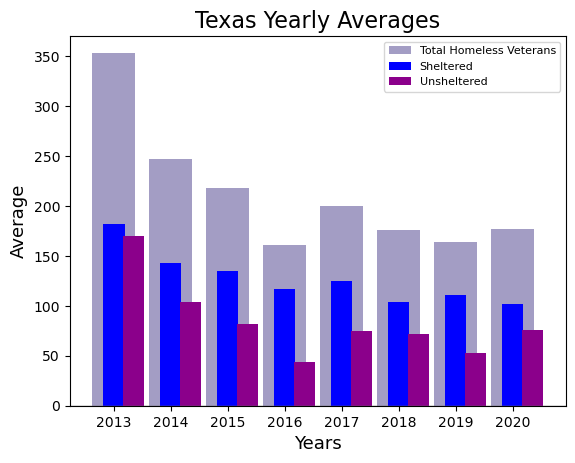

In [399]:
#Overlapping Texas Bar Char

#Set data
y = (("2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"))
thick_bar = merged_states['TX Avg. Homeless Veterans']
thin_bar1 = merged_states['TX Avg. Sheltered Veterans']
thin_bar2 = merged_states['TX Avg. Unsheltered Veterans']
ind = np.arange(len(y))
width = 0.75
fix, ax = plt.subplots()

#Plot thick bar
p1 = ax.bar(ind, thick_bar, width, color='darkslateblue', alpha=0.5, label="Total Homeless Veterans")

#Plot thin bars
thinbar_l = np.arange(len(merged_states['TX Avg. Sheltered Veterans']))
ax.bar(thinbar_l, merged_states["TX Avg. Sheltered Veterans"], width=width/2, label="Sheltered", color="blue")
ax.bar(thinbar_l + bar_width, merged_states["TX Avg. Unsheltered Veterans"], width=width/2, label="Unsheltered", color='darkmagenta')

#Set labels
ax.axhline(0, color='grey', linewidth=0.3)
plt.ylim(0, 370)
ax.set_ylabel("Average", fontsize=13)
ax.set_xlabel("Years", fontsize=13)
ax.set_title("Texas Yearly Averages", fontsize=16)
ax.set_xticklabels(["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

# Set legend
ax.legend(loc="upper right", fontsize=8)



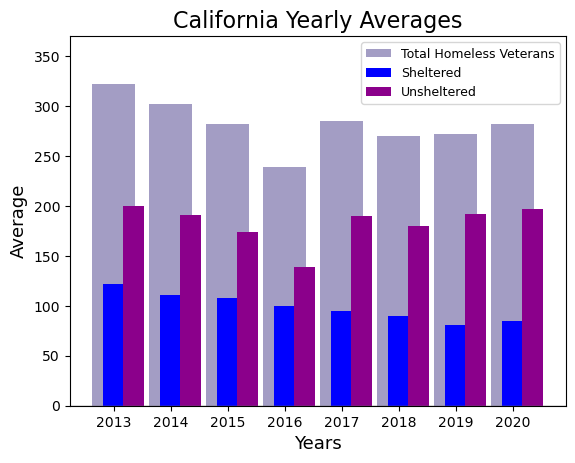

In [383]:
#Overlapping California Bar Chart

#Set data
y = (8)
thick_bar = merged_states['CA Avg. Homeless Veterans']
thin_bar1 = merged_states['CA Avg. Sheltered Veterans']
thin_bar2 = merged_states['CA Avg. Unsheltered Veterans']
ind = np.arange(y)
width = 0.75
fix, ax = plt.subplots()

#Plot thick bar
p1 = ax.bar(ind, thick_bar, width, color='darkslateblue', alpha=0.5, label="Total Homeless Veterans")

#Add thin bars
thinbar_l = np.arange(len(merged_states['CA Avg. Sheltered Veterans']))
ax.bar(thinbar_l, merged_states["CA Avg. Sheltered Veterans"], width=width/2, label="Sheltered", color="blue")
ax.bar(thinbar_l + bar_width, merged_states["CA Avg. Unsheltered Veterans"], width=width/2, label="Unsheltered", color='darkmagenta')

#Set labels
ax.axhline(0, color='grey', linewidth=0.3)
plt.ylim(0, 370)
ax.set_ylabel("Average",fontsize=13)
ax.set_xlabel("Years",fontsize=13)
ax.set_title("California Yearly Averages",fontsize=16)
ax.set_xticklabels(["2012","2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

# Set legend
ax.legend(loc="upper right", fontsize=9)